## Introduction
This project aims to support a car hire company in selecting a fleet of vehicles that meets diverse client needs. The analysis focuses on fuel efficiency, vehicle type, and usage patterns to inform strategic purchasing decisions and provide tailored vehicle recommendations to clients based on their intended usage.


## Problem Statement
The car hire company is looking to:

- Acquire a diverse fleet with options for various client preferences, including SUVs, sedans, and compact cars.
- Understand fuel efficiency trends and identify the best options for cost savings.
- Provide clients with advice on selecting vehicles that best match their travel needs, such as city driving, family trips, or off-road travel.



![Emmotoka Car Dealers](carhire.png)


## Objectives
1. Perform Exploratory Data Analysis (EDA)
- Analyze fuel consumption and efficiency by vehicle type.
- Identify trends in engine size, vehicle age, and emissions.
2. Make Data-Driven Fleet Recommendations
- Recommend vehicles based on fuel efficiency, client usage, and budget.
- Highlight top models for specific uses, such as city driving, long-distance travel, and family outings.
3. Develop Client Advisory Insights
- Provide insights on the best vehicle type for different usage patterns.
- Advise on factors like engine size, fuel type, and expected fuel costs based on usage.



## Data Overview
*Datasets provide model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.*

### Data Info
**Model**
- 4WD/4X4 = Four-wheel drive
- AWD = All-wheel drive
- CNG = Compressed natural gas
- FFV = Flexible-fuel vehicle
- NGV = Natural gas vehicle
- '# = High output engine that provides more power than the standard engine of the same size

**Transmission**
- A = Automatic
- AM = Automated manual
- AS = Automatic with select shift
- AV = Continuously variable
- M = Manual
- 3 - 10 = Number of gears

**Fuel Type**
- X = Regular gasoline
- Z = Premium gasoline
- D = Diesel
- E = Ethanol (E85)
- N = Natural Gas

**Fuel Consumption**
*City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)
CO2 Emissions (g/km),Estimated tailpipe carbon dioxide emissions (in grams per kilometre) are based on fuel type and the combined fuel consumption rating.*

**DATA SOURCE** https://www.kaggle.com/datasets/ahmettyilmazz/fuel-consumption

## Exploring the data

In [50]:
# Loading liraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
# Load the data
df = pd.read_csv("../Data/Fuel_Consumption_2000_2022.csv")
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [52]:
# Basic information about the dataset
print("Basic Dataset Information")
print(f"This data set has {df.shape[0]} rows and {df.shape[1]} columns ")
print("\nColumn names and types:")
print(df.dtypes)
print("\nSummary of missing values:")
print(df.isnull().sum())

Basic Dataset Information
This data set has 22556 rows and 13 columns 

Column names and types:
YEAR                  int64
MAKE                 object
MODEL                object
VEHICLE CLASS        object
ENGINE SIZE         float64
CYLINDERS             int64
TRANSMISSION         object
FUEL                 object
FUEL CONSUMPTION    float64
HWY (L/100 km)      float64
COMB (L/100 km)     float64
COMB (mpg)            int64
EMISSIONS             int64
dtype: object

Summary of missing values:
YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64


In [53]:
# Check the columns in the data
df.columns

Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS'],
      dtype='object')

In [54]:
#Brief data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,22556.0,2011.554442,6.298269,2000.0,2006.0,2012.0,2017.000,2022.0
ENGINE SIZE,22556.0,3.356646,1.335425,0.8,2.3,3.0,4.200,8.4
CYLINDERS,22556.0,5.854141,1.819597,2.0,4.0,6.0,8.000,16.0
FUEL CONSUMPTION,22556.0,12.763513,3.500999,3.5,10.4,12.3,14.725,30.6
HWY (L/100 km),22556.0,8.919126,2.274764,3.2,7.3,8.4,10.200,20.9
COMB (L/100 km),22556.0,11.034341,2.910920,3.6,9.1,10.6,12.700,26.1
COMB (mpg),22556.0,27.374534,7.376982,11.0,22.0,27.0,31.000,78.0
EMISSIONS,22556.0,250.068452,59.355276,83.0,209.0,243.0,288.000,608.0


In [55]:
# Unique values and counts for 'VEHICLE CLASS', sorted alphabetically
vehicle_class_counts = df['VEHICLE CLASS'].value_counts().sort_index()
print("### Unique Values and Counts in VEHICLE CLASS ###")
print(vehicle_class_counts)



### Unique Values and Counts in VEHICLE CLASS ###
VEHICLE CLASS
COMPACT                     2636
Compact                      491
FULL-SIZE                   1086
Full-size                    417
MID-SIZE                    2300
MINICOMPACT                  783
MINIVAN                      366
Mid-size                     660
Minicompact                  211
Minivan                       42
PICKUP TRUCK - SMALL         403
PICKUP TRUCK - STANDARD     1689
Pickup truck: Small          108
Pickup truck: Standard       515
SPECIAL PURPOSE VEHICLE       52
STATION WAGON - MID-SIZE     343
STATION WAGON - SMALL        737
SUBCOMPACT                  1559
SUV                         2640
SUV - SMALL                  827
SUV - STANDARD               514
SUV: Small                   929
SUV: Standard                608
Special purpose vehicle       62
Station wagon: Mid-size       44
Station wagon: Small         140
Subcompact                   451
TWO-SEATER                   999
Two-seater  

In [56]:
# Unique values and counts for 'MODEL', sorted alphabetically
model_counts = df['MODEL'].value_counts().sort_index()
print("\n### Unique Values and Counts in MODEL ###")
print(model_counts)


### Unique Values and Counts in MODEL ###
MODEL
1 SERIES M COUPE     1
1.6EL                2
1.7EL               10
124 SPIDER           2
124 Spider           6
                    ..
iM                   2
iQ                   4
tC                  12
xB                  10
xD                   8
Name: count, Length: 4242, dtype: int64


In [81]:
# Create a copy of the dataset to be ablew to manipulate the data without changing original document
df_copy = df.copy()

# Convert 'MODEL' and 'VEHICLE CLASS' columns to sentence case and remove extra spaces
df_copy['MODEL'] = df_copy['MODEL'].str.title().str.strip()
df_copy['VEHICLE CLASS'] = df_copy['VEHICLE CLASS'].str.title().str.strip()

# Remove extra internal spaces in 'MODEL' and 'VEHICLE CLASS' columns
df_copy['MODEL'] = df_copy['MODEL'].str.replace(r'\s+', ' ', regex=True)
df_copy['VEHICLE CLASS'] = df_copy['VEHICLE CLASS'].str.replace(r'\s+', ' ', regex=True)

# Display the first few rows to verify the changes
print("*Sample Data After Converting to Sentence Case and Removing Extra Spaces*")
print(df_copy[['MODEL', 'VEHICLE CLASS']].head())

*Sample Data After Converting to Sentence Case and Removing Extra Spaces*
     MODEL VEHICLE CLASS
0    1.6El       Compact
1    1.6El       Compact
2    3.2Tl      Mid-Size
3    3.5Rl      Mid-Size
4  Integra    Subcompact


In [82]:
# Unique values and counts for 'VEHICLE CLASS', sorted alphabetically
vehicle_class_counts = df_copy['VEHICLE CLASS'].value_counts().sort_index()
print("### Unique Values and Counts in VEHICLE CLASS ###")
print(vehicle_class_counts)

# Unique values and counts for 'MODEL', sorted alphabetically
model_counts = df_copy['MODEL'].value_counts().sort_index()
print("\n### Unique Values and Counts in MODEL ###")
print(model_counts)

### Unique Values and Counts in VEHICLE CLASS ###
VEHICLE CLASS
Compact                     3127
Full-Size                   1503
Mid-Size                    2960
Minicompact                  994
Minivan                      408
Pickup Truck - Small         403
Pickup Truck - Standard     1689
Pickup Truck: Small          108
Pickup Truck: Standard       515
Special Purpose Vehicle      114
Station Wagon - Mid-Size     343
Station Wagon - Small        737
Station Wagon: Mid-Size       44
Station Wagon: Small         140
Subcompact                  2010
Suv                         2640
Suv - Small                  827
Suv - Standard               514
Suv: Small                   929
Suv: Standard                608
Two-Seater                  1312
Van - Cargo                  332
Van - Passenger              287
Van: Passenger                12
Name: count, dtype: int64

### Unique Values and Counts in MODEL ###
MODEL
1 Series M Coupe     1
1.6El                2
1.7El               10


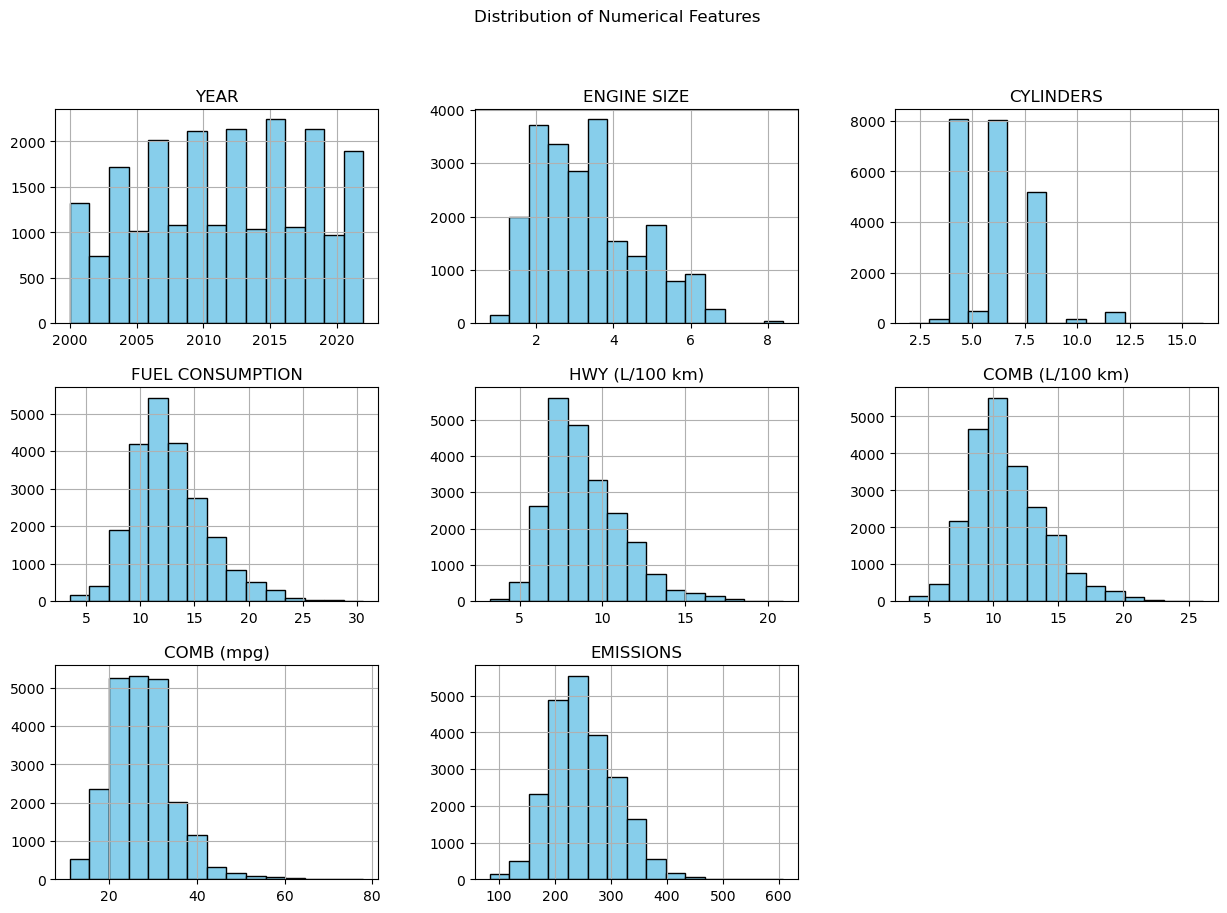

In [57]:
# Plotting Histograms for Numerical Features
df.select_dtypes(include=['float64', 'int64']).hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

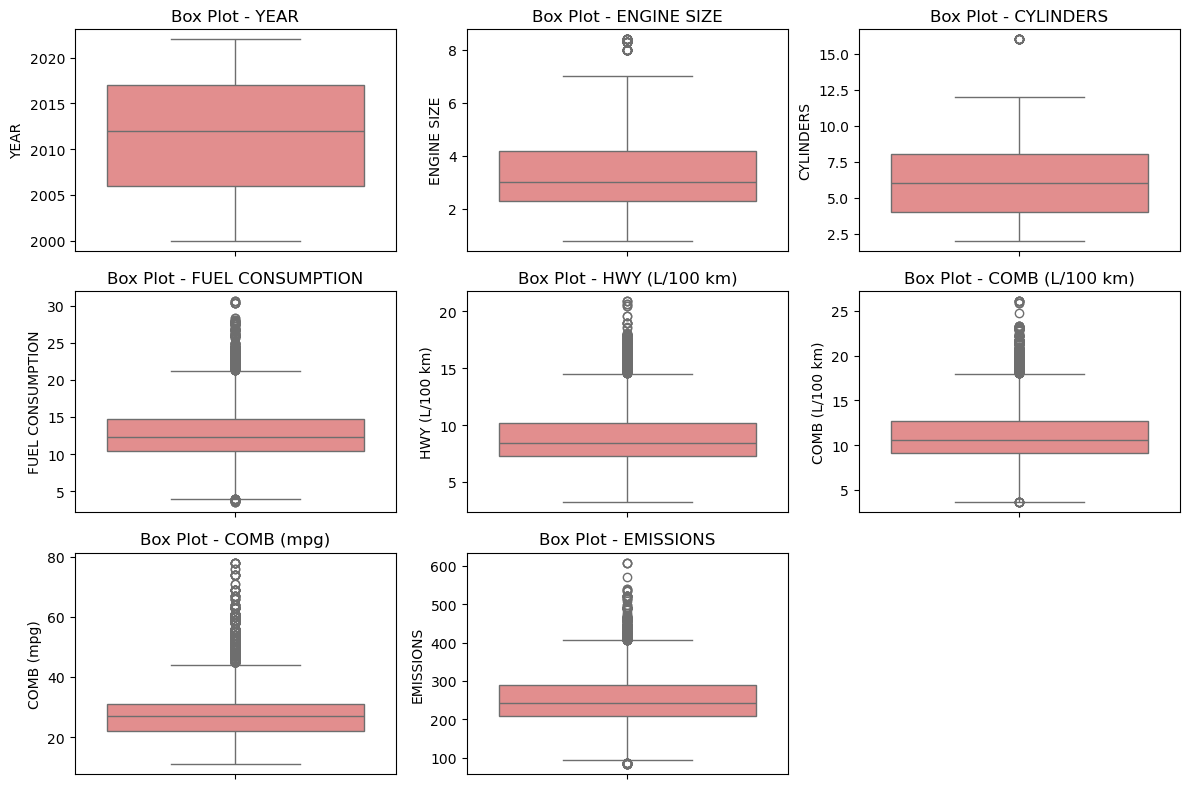

In [58]:
# Box Plots for Outliers Detection
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color="lightcoral")
    plt.title(f"Box Plot - {col}")
plt.tight_layout()
plt.show()

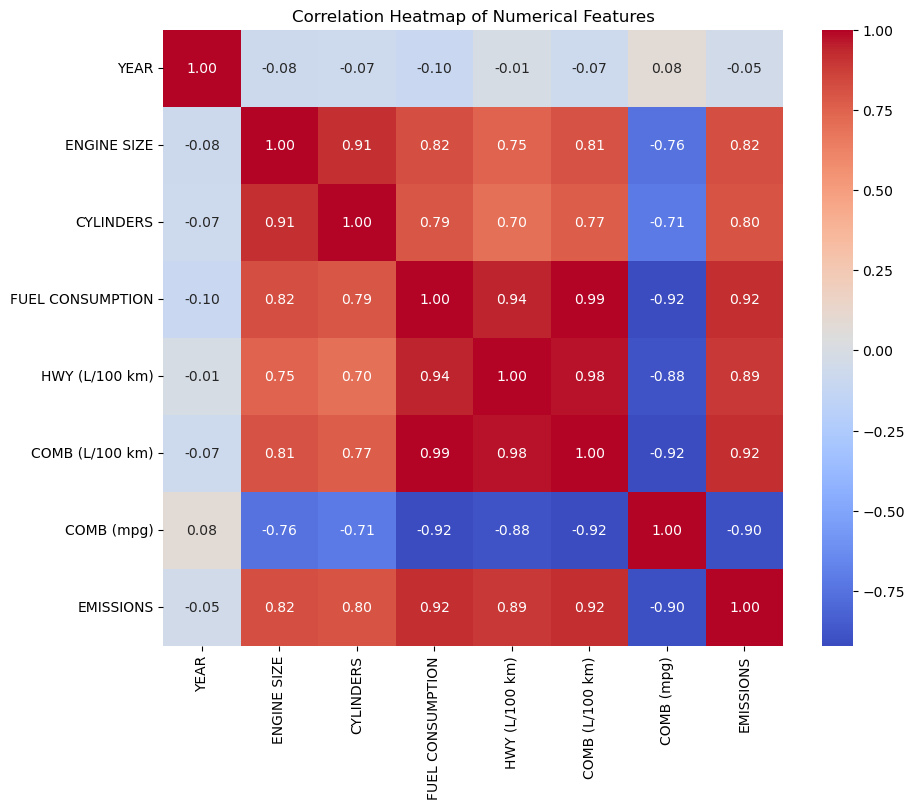

In [59]:
# Select only numerical columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

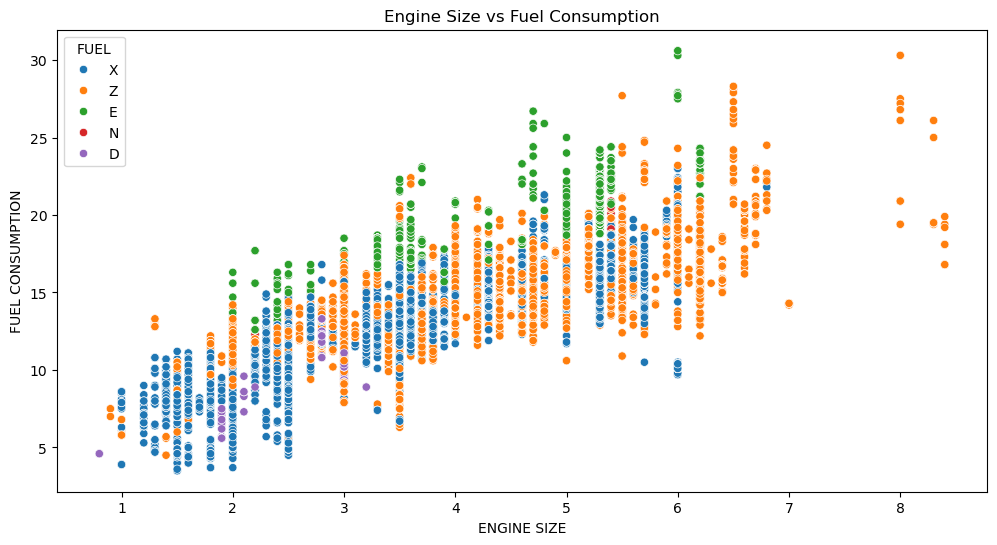

/var/folders/ng/_1y85s657s7fv7ng392fzw680000gn/T/ipykernel_2324/1157149623.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='FUEL', y='FUEL CONSUMPTION', palette="Set2")


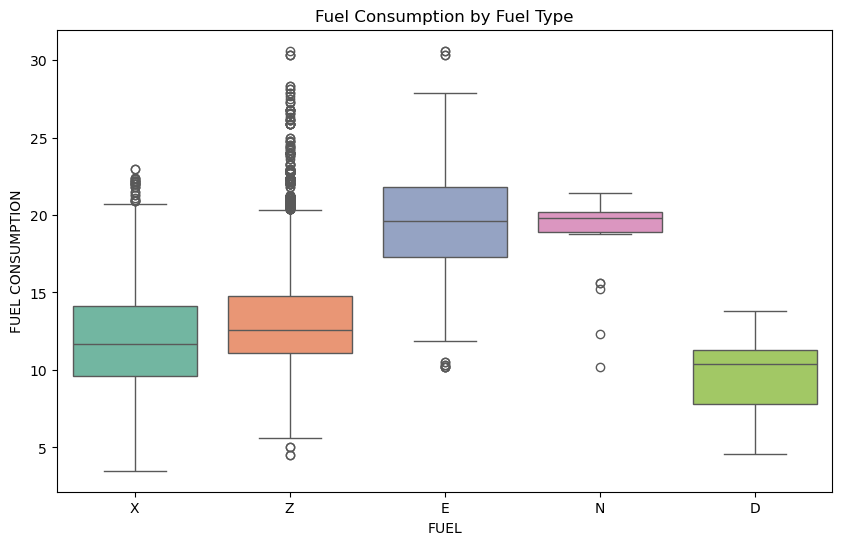

In [60]:
# Scatter Plot: Engine Size vs Fuel Consumption
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='ENGINE SIZE', y='FUEL CONSUMPTION', hue='FUEL')
plt.title("Engine Size vs Fuel Consumption")
plt.show()

# Box Plot: Fuel Consumption by Fuel Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='FUEL', y='FUEL CONSUMPTION', palette="Set2")
plt.title("Fuel Consumption by Fuel Type")
plt.show()



### Average Fuel Consumption by Fuel Type ###
FUEL
D     9.727707
X    11.898452
Z    13.165554
N    19.024242
E    19.512325
Name: FUEL CONSUMPTION, dtype: float64


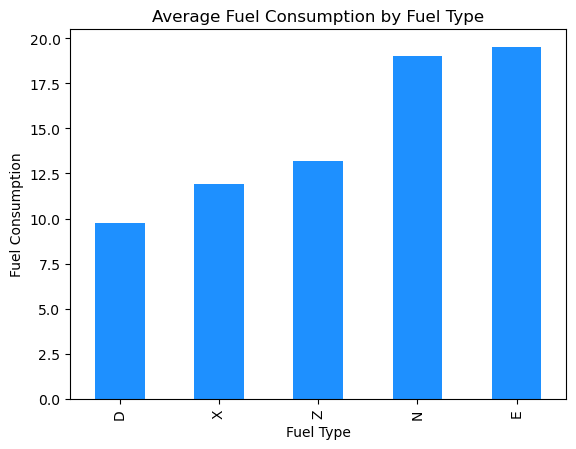

In [61]:
# Average Fuel Consumption by Fuel Type
fuel_type_stats = df.groupby('FUEL')['FUEL CONSUMPTION'].mean().sort_values()
print("\n### Average Fuel Consumption by Fuel Type ###")
print(fuel_type_stats)

# Plot of Average Fuel Consumption by Fuel Type
fuel_type_stats.plot(kind='bar', color='dodgerblue')
plt.title("Average Fuel Consumption by Fuel Type")
plt.ylabel("Fuel Consumption")
plt.xlabel("Fuel Type")
plt.show()


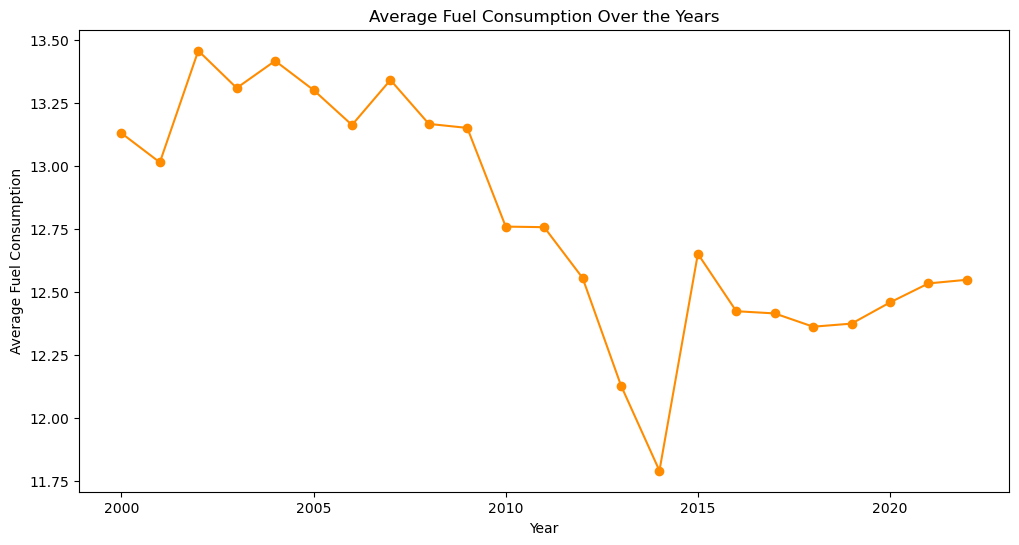

In [62]:
# Average Fuel Consumption Over the Years
if 'YEAR' in df.columns:
    year_avg_fuel = df.groupby('YEAR')['FUEL CONSUMPTION'].mean()
    plt.figure(figsize=(12, 6))
    year_avg_fuel.plot(marker='o', color='darkorange')
    plt.title("Average Fuel Consumption Over the Years")
    plt.ylabel("Average Fuel Consumption")
    plt.xlabel("Year")
    plt.show()



### Average Fuel Consumption by Vehicle Type ###
VEHICLE CLASS
Station wagon: Small         9.113571
STATION WAGON - SMALL       10.152374
Compact                     10.395519
COMPACT                     10.705159
SUV: Small                  11.017330
Mid-size                    11.017879
SUV - SMALL                 11.302539
MID-SIZE                    11.525478
STATION WAGON - MID-SIZE    11.588338
SPECIAL PURPOSE VEHICLE     11.590385
SUBCOMPACT                  11.652149
Special purpose vehicle     11.690323
MINICOMPACT                 11.762963
Subcompact                  12.289800
Minicompact                 12.427962
Minivan                     12.571429
Full-size                   12.890887
Pickup truck: Small         12.930556
PICKUP TRUCK - SMALL        13.026551
Station wagon: Mid-size     13.184091
MINIVAN                     13.472678
TWO-SEATER                  13.715716
FULL-SIZE                   13.847053
SUV                         13.906705
Two-seater              

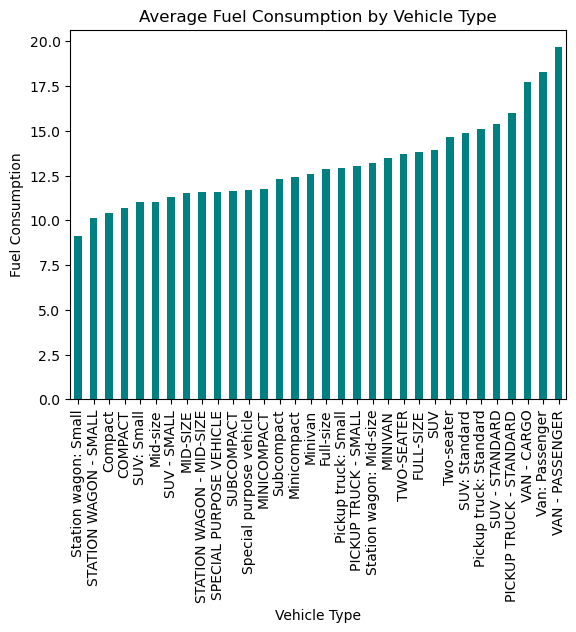

In [63]:
vehicle_type_avg = df.groupby('VEHICLE CLASS')['FUEL CONSUMPTION'].mean().sort_values()
print("\n### Average Fuel Consumption by Vehicle Type ###")
print(vehicle_type_avg)

# Plot fuel consumption by vehicle type
vehicle_type_avg.plot(kind='bar', color='teal')
plt.title("Average Fuel Consumption by Vehicle Type")
plt.ylabel("Fuel Consumption")
plt.xlabel("Vehicle Type")
plt.show()

In [79]:
# List top 10 fuel-efficient models
top_fuel_efficient = df_copy[['MODEL', 'FUEL CONSUMPTION']].sort_values(by='FUEL CONSUMPTION').head(10)
print("\n### Top 10 Fuel-Efficient Models ###")
print(top_fuel_efficient)



### Top 10 Fuel-Efficient Models ###
               MODEL  FUEL CONSUMPTION
12084        Prius C               3.5
13143        Prius C               3.5
14184        Prius C               3.6
11009          Prius               3.7
14183          Prius               3.7
12083          Prius               3.7
13684  Accord Hybrid               3.7
9912           Prius               3.7
13142          Prius               3.7
982          Insight               3.9



### Average Fuel Consumption by Fuel Type ###
FUEL
D     9.727707
X    11.898452
Z    13.165554
N    19.024242
E    19.512325
Name: FUEL CONSUMPTION, dtype: float64


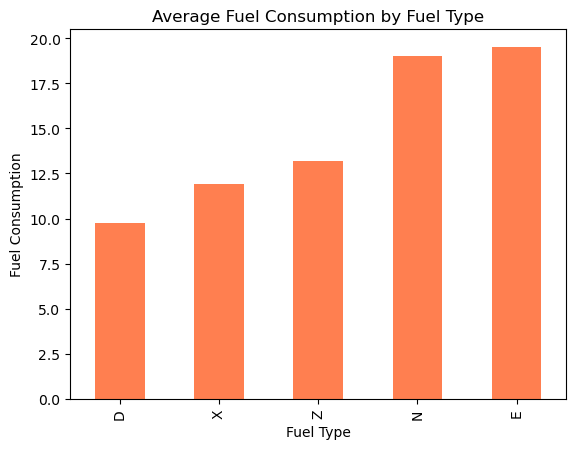

In [65]:
# Average fuel consumption by fuel type
fuel_type_avg = df.groupby('FUEL')['FUEL CONSUMPTION'].mean().sort_values()
print("\n### Average Fuel Consumption by Fuel Type ###")
print(fuel_type_avg)

# Plot average fuel consumption by fuel type
fuel_type_avg.plot(kind='bar', color='coral')
plt.title("Average Fuel Consumption by Fuel Type")
plt.ylabel("Fuel Consumption")
plt.xlabel("Fuel Type")
plt.show()


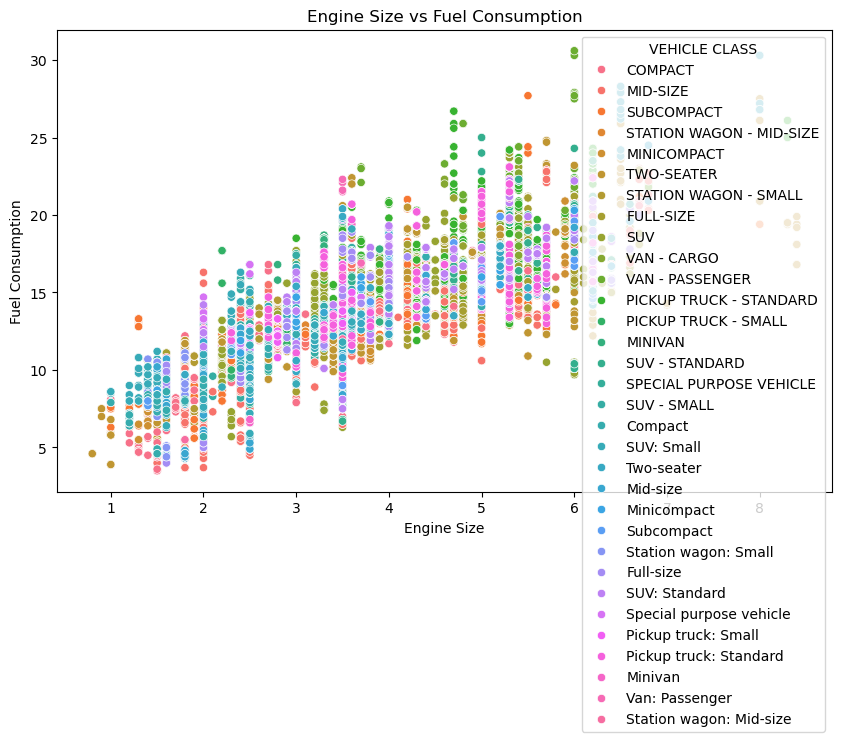

In [66]:
# Scatter plot for engine size vs fuel consumption
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ENGINE SIZE', y='FUEL CONSUMPTION', hue='VEHICLE CLASS')
plt.title("Engine Size vs Fuel Consumption")
plt.xlabel("Engine Size")
plt.ylabel("Fuel Consumption")
plt.show()


In [68]:
# Count of unique values in the 'VEHICLE CLASS' column, sorted alphabetically
vehicle_class_counts = df['VEHICLE CLASS'].value_counts().sort_index()
print("### Unique Values and Counts in VEHICLE CLASS ###")
print(vehicle_class_counts)

# Count of unique values in the 'VEHICLE MODEL' column, sorted alphabetically
vehicle_model_counts = df['MODEL'].value_counts().sort_index()
print("\n### Unique Values and Counts in VEHICLE MODEL ###")
print(vehicle_model_counts)


### Unique Values and Counts in VEHICLE CLASS ###
VEHICLE CLASS
COMPACT                     2636
Compact                      491
FULL-SIZE                   1086
Full-size                    417
MID-SIZE                    2300
MINICOMPACT                  783
MINIVAN                      366
Mid-size                     660
Minicompact                  211
Minivan                       42
PICKUP TRUCK - SMALL         403
PICKUP TRUCK - STANDARD     1689
Pickup truck: Small          108
Pickup truck: Standard       515
SPECIAL PURPOSE VEHICLE       52
STATION WAGON - MID-SIZE     343
STATION WAGON - SMALL        737
SUBCOMPACT                  1559
SUV                         2640
SUV - SMALL                  827
SUV - STANDARD               514
SUV: Small                   929
SUV: Standard                608
Special purpose vehicle       62
Station wagon: Mid-size       44
Station wagon: Small         140
Subcompact                   451
TWO-SEATER                   999
Two-seater  

In [70]:
# Unique values and counts for 'VEHICLE CLASS', sorted alphabetically
vehicle_class_counts = df_copy['VEHICLE CLASS'].value_counts().sort_index()
print("### Unique Values and Counts in VEHICLE CLASS ###")
print(vehicle_class_counts)

# Unique values and counts for 'MODEL', sorted alphabetically
model_counts = df_copy['MODEL'].value_counts().sort_index()
print("\n### Unique Values and Counts in MODEL ###")
print(model_counts)



### Unique Values and Counts in VEHICLE CLASS ###
VEHICLE CLASS
Compact                     3127
Full-Size                   1503
Mid-Size                    2960
Minicompact                  994
Minivan                      408
Pickup Truck - Small         403
Pickup Truck - Standard     1689
Pickup Truck: Small          108
Pickup Truck: Standard       515
Special Purpose Vehicle      114
Station Wagon - Mid-Size     343
Station Wagon - Small        737
Station Wagon: Mid-Size       44
Station Wagon: Small         140
Subcompact                  2010
Suv                         2640
Suv - Small                  827
Suv - Standard               514
Suv: Small                   929
Suv: Standard                608
Two-Seater                  1312
Van - Cargo                  332
Van - Passenger              287
Van: Passenger                12
Name: count, dtype: int64

### Unique Values and Counts in MODEL ###
MODEL
1 Series M Coupe     1
1.6El                2
1.7El               10


In [71]:
# Replace ':' with ' -' in the 'VEHICLE CLASS' column
df_copy['VEHICLE CLASS'] = df_copy['VEHICLE CLASS'].str.replace(':', ' -')

# Display the first few rows to verify the changes
print("### Sample Data After Replacing ':' with ' -' in VEHICLE CLASS ###")
print(df_copy[['VEHICLE CLASS']].head())


### Sample Data After Replacing ':' with ' -' in VEHICLE CLASS ###
  VEHICLE CLASS
0       Compact
1       Compact
2      Mid-Size
3      Mid-Size
4    Subcompact


In [72]:
# Unique values and counts for 'VEHICLE CLASS', sorted alphabetically
vehicle_class_counts = df_copy['VEHICLE CLASS'].value_counts().sort_index()
print("### Unique Values and Counts in VEHICLE CLASS ###")
print(vehicle_class_counts)

# Unique values and counts for 'MODEL', sorted alphabetically
model_counts = df_copy['MODEL'].value_counts().sort_index()
print("\n### Unique Values and Counts in MODEL ###")
print(model_counts)


### Unique Values and Counts in VEHICLE CLASS ###
VEHICLE CLASS
Compact                     3127
Full-Size                   1503
Mid-Size                    2960
Minicompact                  994
Minivan                      408
Pickup Truck - Small         511
Pickup Truck - Standard     2204
Special Purpose Vehicle      114
Station Wagon - Mid-Size     387
Station Wagon - Small        877
Subcompact                  2010
Suv                         2640
Suv - Small                 1756
Suv - Standard              1122
Two-Seater                  1312
Van - Cargo                  332
Van - Passenger              299
Name: count, dtype: int64

### Unique Values and Counts in MODEL ###
MODEL
1 Series M Coupe     1
1.6El                2
1.7El               10
124 Spider           8
128I Cabriolet      12
                    ..
Z4 Sdrive35I        13
Z4 Sdrive35Is        6
Z8                   4
Zdx Awd              3
Zephyr               1
Name: count, Length: 3715, dtype: int64


In [73]:
# Count unique values in the original DataFrame
original_model_count = df['MODEL'].nunique()
original_vehicle_class_count = df['VEHICLE CLASS'].nunique()

# Count unique values in the copied (cleaned) DataFrame
copy_model_count = df_copy['MODEL'].nunique()
copy_vehicle_class_count = df_copy['VEHICLE CLASS'].nunique()

# Display the counts
print("### Unique Counts in Original DataFrame ###")
print(f"Unique models: {original_model_count}")
print(f"Unique vehicle classes: {original_vehicle_class_count}")

print("\n### Unique Counts in Copied (Cleaned) DataFrame ###")
print(f"Unique models: {copy_model_count}")
print(f"Unique vehicle classes: {copy_vehicle_class_count}")

# Compare and summarize results
print("\n### Comparison Summary ###")
print(f"Difference in unique models: {original_model_count - copy_model_count}")
print(f"Difference in unique vehicle classes: {original_vehicle_class_count - copy_vehicle_class_count}")


### Unique Counts in Original DataFrame ###
Unique models: 4242
Unique vehicle classes: 32

### Unique Counts in Copied (Cleaned) DataFrame ###
Unique models: 3715
Unique vehicle classes: 17

### Comparison Summary ###
Difference in unique models: 527
Difference in unique vehicle classes: 15


In [74]:
# Get the number of rows in the original and copied (cleaned) DataFrames
original_size = df.shape[0]
copy_size = df_copy.shape[0]

# Display the sizes
print("### Size Comparison ###")
print(f"Number of rows in original DataFrame: {original_size}")
print(f"Number of rows in copied (cleaned) DataFrame: {copy_size}")

# Check if there's a difference
if original_size == copy_size:
    print("\nBoth DataFrames have the same number of rows.")
else:
    print(f"\nDifference in size: {original_size - copy_size} rows removed in the cleaned DataFrame.")


### Size Comparison ###
Number of rows in original DataFrame: 22556
Number of rows in copied (cleaned) DataFrame: 22556

Both DataFrames have the same number of rows.
